# Gradient Descent

**Outline**

* Description
* Introducing Gradient Descent using Linear Regression
    * Cost Function
    * Gradient Descent Intuition
    * Batch Gradient Descent
    * Mini-Batch/Stochastic Gradient Descent
    * A Toy Example
* Using Gradient Descent to solve Logistic Regression(To be updated)
    * Cost Function
    * A Toy Example

---

In [1]:
options(repr.plot.width = 5)
options(repr.plot.height = 5)
library(ggplot2)

### Description

Gradient Descent is a optimization method that can be used for finding the minimum of a function. In different machine learning method, to fit a model, very often we will start by defining a cost function, say $J$,which is a function of the parameter's, say $\theta$, that we want to obtain. We want to find the minimum of the cost function by adjusting the parameters. The question for us to solve is:

> *How do we find the $\theta$ to minimize the cost function $J(\theta)$?*

Gradient Descent is a way to solve this.

### Introducing Gradient Descent using Linear Regression

**Cost Function**

For [linear regression](https://github.com/johnnychiuchiu/Machine-Learning/blob/master/LinearRegression/linearRegressionModelBuilding.pdf), our cost function is defined as follows:

$$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} \Big( h_{\theta}(x^{(i)})-y^{(i)} \Big)^2 $$

where
* $h_{\theta} = \sum_{i=1}^{n} \theta_i x_i = \theta^TX$: linear function of x with parameters $\theta_i$
* **m**: number of observations 
* **n**: number of features

**Gradient Descent Intuition**

If our cost function is a convex function in $\theta_1$ and $J(\theta_1)$ plane, like the plot below:

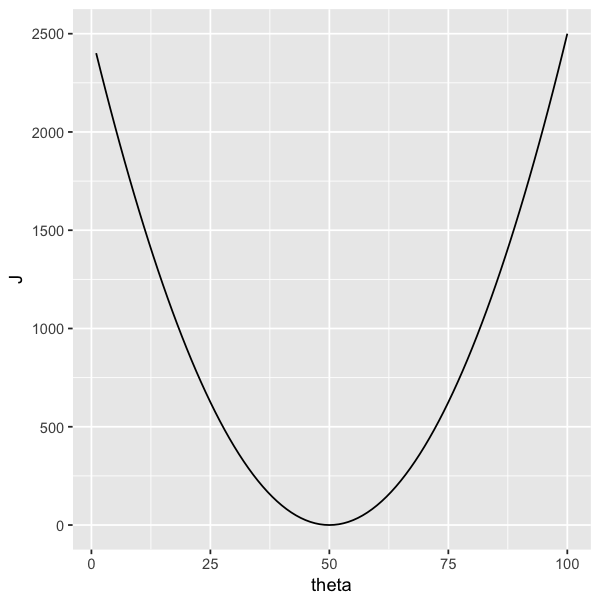

In [2]:
convex_plot <- function(){
    eq = function(x){(x-50)^2}
    theta=seq(1,100,1)
    J=eq(theta)
    qplot(theta, J,geom="line")
}
convex_plot()

The gradient descent algorithm is shown as follows:

```
repeat until convergence{
```
$\quad\quad\quad \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$
```
} (for every j=0,...,n)
```

We can also write the above formula in a more mathamatical way

$$\theta := \theta - \alpha \bigtriangledown_{\theta} J $$

where 

$\bigtriangledown_{\theta} J= \begin{bmatrix}
       \frac{\partial J}{\partial \theta_0} \\
       \frac{\partial J}{\partial \theta_1} \\
       \vdots \\
       \frac{\partial J}{\partial \theta_n} 
     \end{bmatrix}
     $

The intuition behind that is that we are trying to update our $\theta$ in each iteration. Hopefully after certain amount of iteration, all the $\theta$ will help to minimize the value of the cost function.

For example, if $\theta_1$ is start with value 80, then $\frac{\partial}{\partial \theta_1}J(\theta)$ will be larger than 0. Therefore, we would probably want to decrease our $\theta_1$ by a certain amount after this iteration. From the gradient descent formula above, it will become $\theta_j := \theta_j - \alpha (\text{a positive number})$. This equaltion satisties what we want to do, since it makes $\theta_j$ become smaller.

If $\theta_1$ is start with value 20, then $\frac{\partial}{\partial \theta_1}J(\theta)$ will be smaller than 0. We would probably want to increase our $\theta_1$ by a certain amount after this iteration. Our formula in this case become $\theta_j := \theta_j - \alpha (\text{a negative number})$. Following this equation we can indeed make our $\theta_1$ become larger, i.e., getting closer to the minimum point of the plot.

Notice that the value $\alpha$ decides how big each step goes. If $\alpha$ is too small, then the "gradient descent" will be slow. In other words, each step $\theta$ takes will be small. If $\alpha$ is too large, gradient descent can overshoot the minimum. It may fail to converge, or even diverge. 

**Batch Gradient Descent**

So, what is $\frac{\partial}{\partial \theta_1}J(\theta)$ if our cost function is  
$J(\theta) = \frac{1}{2} \sum_{i=1}^{m} \Big( h_{\theta}(x^{(i)})-y^{(i)} \Big)^2 $ ? More generally, we use $\theta_j$ in the derivation below.

$$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})^2 \\
=\frac{1}{2} \Big[2(h_{\theta}(x^{(1)})-y^{(1)})\frac{\partial}{\partial \theta_i}h_{\theta}(x^{(1)}) + \dots +    2(h_{\theta}(x^{(m)})-y^{(m)})\frac{\partial}{\partial \theta_i}h_{\theta}(x^{(m)}) \Big] \\
=\frac{1}{2} \Big[2(h_{\theta}(x^{(1)})-y^{(1)})x_j^{(1)} + \dots +  2(h_{\theta}(x^{(m)})-y^{(m)})x_j^{(m)} \Big] \\ = \sum_{i=1}^{m}\Big(h_{\theta}(x^{(i)})-y^{(i)} \Big) x_j^{(i)} $$ 

Therefore, to update the value of $\theta_6$, each time we will need to sum up the multiple of 
1. the differerce between $h_{\theta}(x^{(i)}) - y^{(i)}$
2. the 6th element of the ith observation

To make it more clearer, we will need to calculate the difference between predicted y to the actual y for every observation, and each differece is multiplied it by the 6th element of the observation. Then, we sum up all the multiplied value to get our $\frac{\partial}{\partial \theta_6}J(\theta)$. More formally,

$$\theta_6 := \theta_6 - \alpha \frac{\partial}{\partial \theta_6}J(\theta) \\
= \theta_6 - \alpha  \sum_{i=1}^{m}\Big(h_{\theta}(x^{(i)})-y^{(i)} \Big) x_j^{(i)}$$

Notice that in each iteration, we use all m observations to update all of our $\theta$'s. This is why this approach is called *Batch Gradient Descent*. For each step of Batch Gradient Descent, we have to look at the entire training set, and perform a sum of all the training examples. If m is too large, then for each step it will be very slow. 

**Mini-Batch/Stochastic Gradient Descent**

In stochastic gradient descent, in each step it instead use only a particular observation to make an update for all the $\theta$'s. The process look likes this:

```
repeat until convergence{
    For i=1 to m {
```
$\quad\quad\quad\quad\quad \theta_j := \theta_j - \alpha \Big(h_{\theta}(x^{(i)})-y^{(i)} \Big) x_j^{(i)} \quad \text{(for every j=0,...,n)}$
```
    }     
} 
```

In the first iteration, we use the first observation to make an update on all the parameters. In idea behind it is that since to make an improvement for all the $\theta$'s cost us too much time, in the first iteration, let's just make sure $\theta_1$, or at least one of the parameter is getting better if we use some other observation to make an improvement. In this way, we don't need to use all m training example to make an update for all the observations in each iteration. It is much faster than Batch Gradient Descent. 

If we use 10 observations to update all the $\theta$ in each iteration, then it is called *Mini-Batch Gradient Descent*

### A Toy Example

**Linear Regression using Batch Gradient Descent**

In [3]:
hypothesis<-function(theta,x){
  if(length(theta)==length(x)){
    sum<-(t(theta)%*%x)[1,1]
    return(sum)
  }else{
    print("Error:The length of Theta and X should be the same!")
  } 
}

theta<-function(data){
  return(rep(0,dim(data)[2]))
}

batch<-function(data,index,theta){
  sum<-0
  for (i in 1:dim(data)[1]){
    sum<-(hypothesis(theta,c(1,data[i,1]))-data[i,2])*c(1,data[i,1])[index]+sum
  }
  return(sum)
}

batch_gd<-function(data,beta){
  theta<-theta(data)
  alpha=1/8000 
  for (i in 1:beta){
    for (j in 1:length(theta)){
      theta[j]<-theta[j]-alpha*batch(data,j,theta)
    }    
  }
  return(theta)
}

SumOfSquareError<-function(theta,data){
  sum<-0
  for (i in 1:dim(data)[1]){
    sum<-(hypothesis(theta,c(1,data[i,1]))-data[i,2])^2+sum
  }
  return(sum)
}

myBatchPlot<-function(data,beta){
  y<-data[,2]
  x<-data[,1]    
  plot(
    x,y,
    pch=21,col="black",bg="lightblue",
    xlab=colnames(data)[2],
    ylab=colnames(data)[1], 
  )
  abline(a=batch_gd(data,beta)[1],b=batch_gd(data,beta)[2],lwd=3)
  Squared_Error<-SumOfSquareError(batch_gd(data,beta),data)
  title(main=paste("Sum of Square Error=",round(Squared_Error,3),
                   "\n","iteration=",beta))
}

In [4]:
head(cars)
data=cars

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


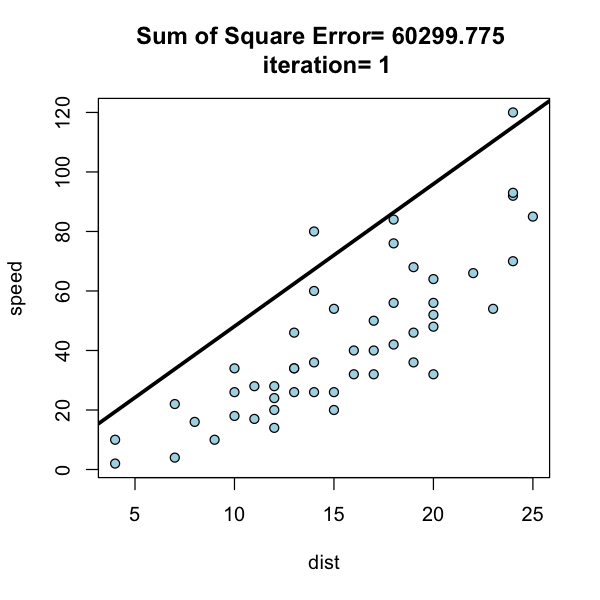

In [5]:
myBatchPlot(data,1)

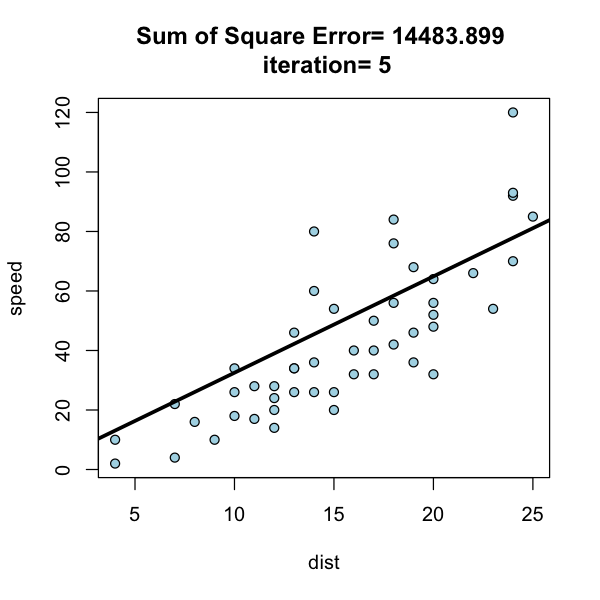

In [6]:
myBatchPlot(data,5)

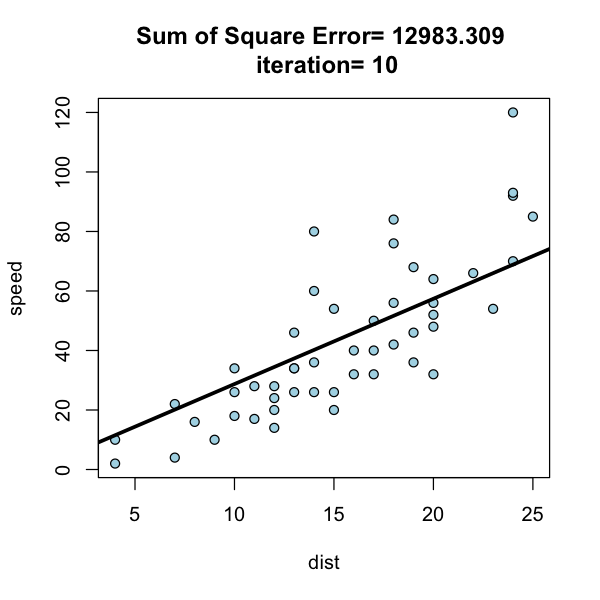

In [7]:
myBatchPlot(data,10)

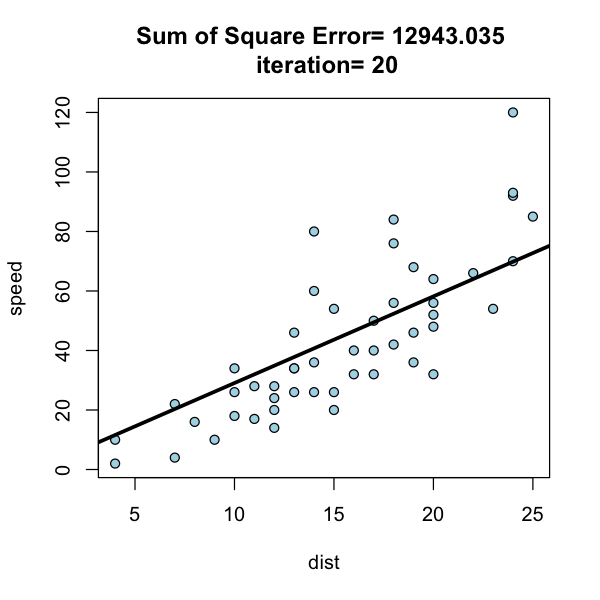

In [8]:
myBatchPlot(data,20)

**Linear Regression using Stochastic Gradient Descent**

In [9]:
head(data)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


In [10]:
hypothesis<-function(theta,x){
  if(length(theta)==length(x)){
    sum<-(t(theta)%*%x)[1,1]
    return(sum)
  }else{
    print("Error:The length of Theta and X should be the same!")
  } 
}

theta<-function(data){
  return(rep(0,dim(data)[2]))
}

sto<-function(data,index,theta,iter){
  sum<-0
  sum<-(hypothesis(theta,c(1,data[iter,1]))-data[iter,2])*c(1,data[iter,1])[index]+sum  
  return(sum)
}

sto_gd<-function(data,beta){
  theta<-theta(data)
  alpha=1/1000 
  for (i in 1:beta){
    for (j in 1:length(theta)){
      theta[j]<-theta[j]-alpha*sto(data,j,theta,i)
    }    
  }
  return(theta)
}

SumOfSquareError<-function(theta,data){
  sum<-0
  for (i in 1:dim(data)[1]){
    sum<-(hypothesis(theta,c(1,data[i,1]))-data[i,2])^2+sum
  }
  return(sum)
}

mystoPlot<-function(data, beta){
  y<-data[,2]
  x<-data[,1]   
  plot(
    x,y,
    pch=21,col="black",bg="lightblue",
    xlab="speed",
    ylab="dist"
  )
  abline(a=sto_gd(data,beta)[1],b=sto_gd(data,beta)[2],lwd=3)
  Squared_Error<-SumOfSquareError(sto_gd(data,beta),data)
  title(main=paste("Sum of Square Error=",round(Squared_Error,3),
                   "\n","iteration=",beta))
}

In [11]:
a=theta(data)
str(a)

 num [1:2] 0 0


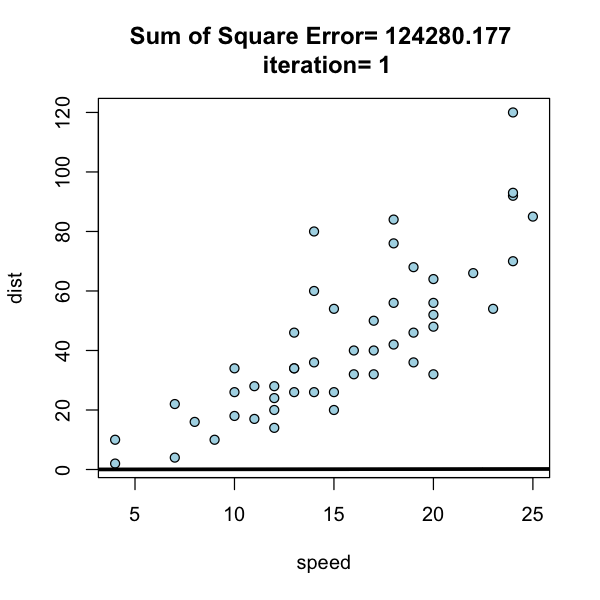

In [12]:
mystoPlot(data, 1)

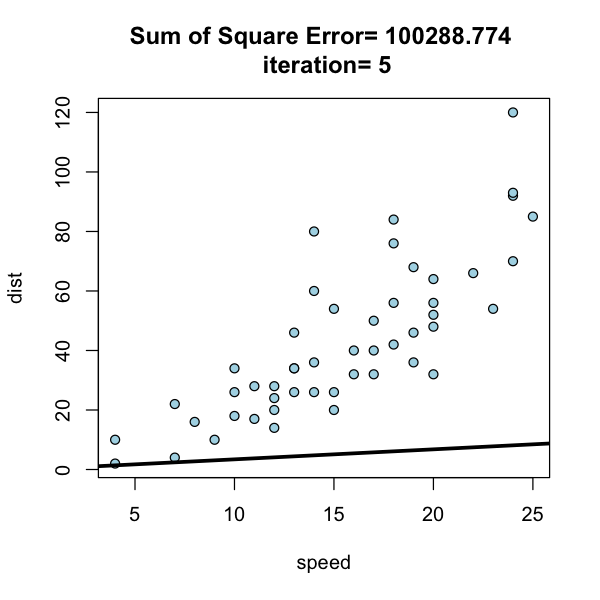

In [13]:
mystoPlot(data, 5)

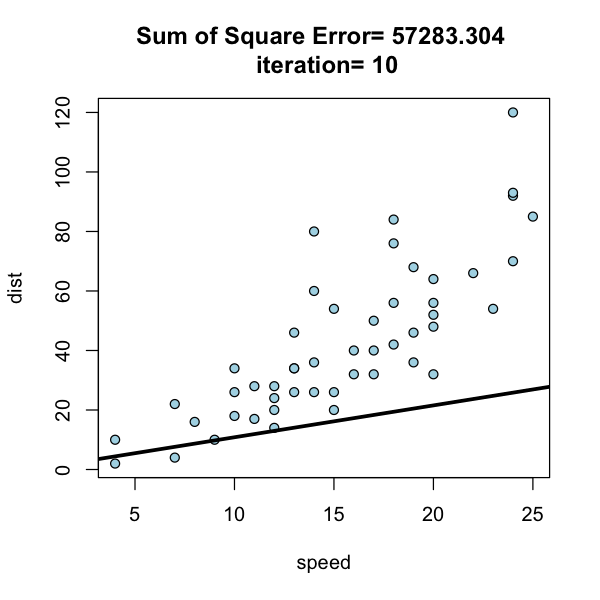

In [14]:
mystoPlot(data, 10)

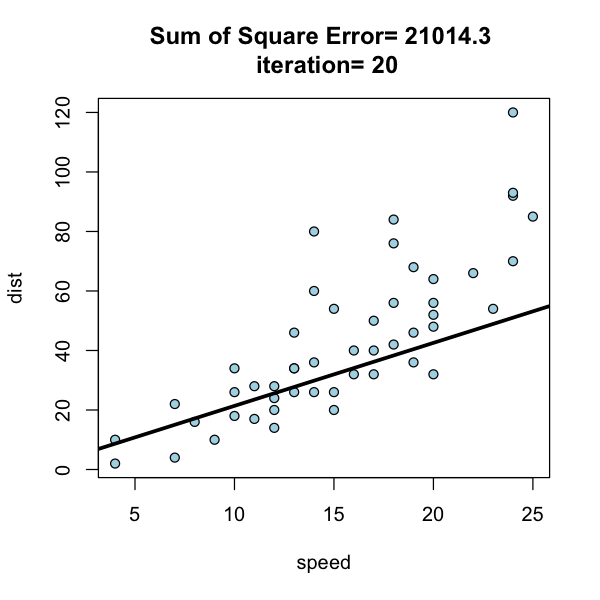

In [15]:
mystoPlot(data, 20)

We can see that after 20 iteration, the sum of square error of stochastic gradient is still over 20k and the SSE for batch gradient descent is already converged to around 12.9k. To sum up


* *Batch gradient descent*
    * Faster to converge, slower to iterate.
* *Stochastic gradient descent*
    * Faster to iterate, slower to converge.

### Reference

* [Gradient Descent Wiki](https://en.wikipedia.org/wiki/Gradient_descent)
* [Stochastic Gradient Descent from Andrew ng](https://www.coursera.org/learn/machine-learning/lecture/DoRHJ/stochastic-gradient-descent)